# How does the Internet work?


Some information from the Internet (pardon the pun):

1. [From HP](https://www.hp.com/us-en/shop/tech-takes/how-does-the-internet-work)
2. [From Microsoft](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/How_does_the_Internet_work)

# Application Program Interface (API)

API stands for application programming interface, which is a set of definitions and protocols for building and integrating application software.

APIs permit products or services to communicate with other products and services without having to know how they’re implemented. This can simplify app development, saving time and money. When designing new tools and products — or managing existing ones — APIs provide flexibility; simplified design, administration, and use; thus providing opportunities for innovation.

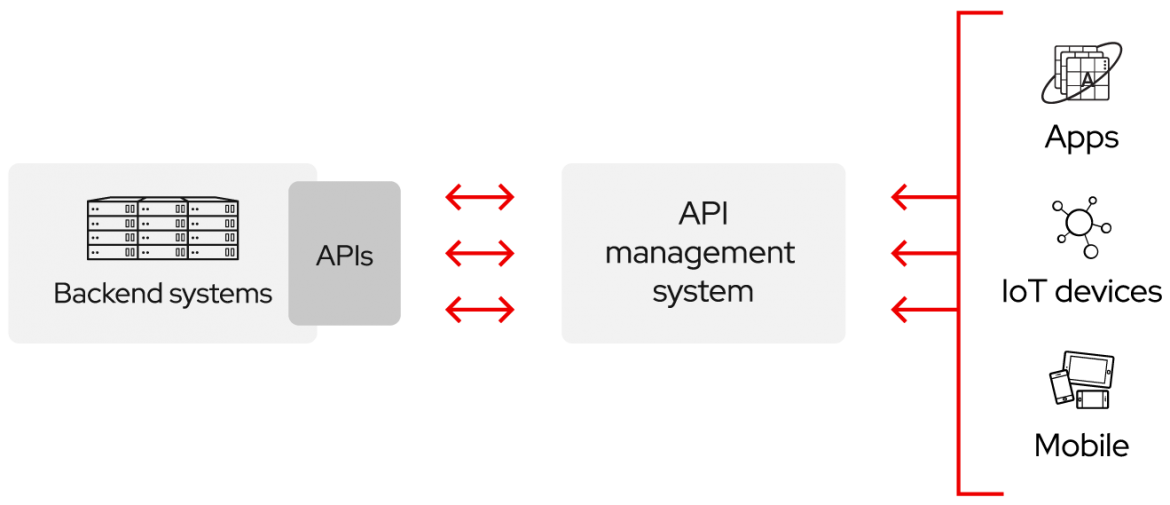

APIs are typically exposed in one of the following release policies:

1. Private - Used only for internal use.
2. Partner - Shared with specific business partners, usually providing the API provider with a revenue stream.
3. Public - Available to all.


An API uses a set of definitions and protocols for building and integrating the application software and are designed through a communications network.  The communications network is typically via the Internet, i.e. web standards and protocols.

Thus, requests are initiated via the HTTP protocol, i.e. GET and POST and the response message is typically in an XML or JSON format.

In the early days of APIs, the Simple Object Access Protocol (SOAP) protocol was used for the client-server interacation.  This has been usurped by the  Representational State Transfer (REST) architecture.  Web APIs that adhere to REST are called RESTful APIs.

RESTful APIs adhere to the following six guiding constraints.

1. **Client-server architecture**: REST architecture is composed of clients, servers, and resources, and it handles requests through HTTP.

2. **Statelessness**: No client content is stored on the server between requests. Information about the session state is, instead, held with the client.

3. **Cacheability**: Caching can eliminate the need for some client-server interactions.

4. **Layered system**: Client-server interactions can be mediated by additional layers. These layers could offer additional features like load balancing, shared caches, or security.

5. **Code on demand (optional)**: Servers can extend the functionality of a client by transferring executable code.

6. **Uniform interface**: This constraint is core to the design of RESTful APIs and includes 4 facets:
    - **Resource identification in requests**: Resources are identified in requests and are separate from the representations returned to the client.
    - **Resource manipulation through representations**: Clients receive files that represent resources. These representations must have enough information to allow modification or deletion.
    - **Self-descriptive messages**: Each message returned to a client contains enough information to describe how the client should process the information.
    - **Hypermedia as the engine of application state**: After accessing a resource, the REST client should be able to discover through hyperlinks all other actions that are currently available.


Before going any further, let's take a look at both the documentation for the [OpenWeather API](https://openweathermap.org/api) and for the Python [requests](https://docs.python-requests.org/en/latest/) library.

In [1]:
import requests

url = 'http://api.openweathermap.org/data/2.5/weather?q=Boston&appid=15ece53c9c5a8b3fbbe2ce705860281a&mode=json&units=imperial'
r = requests.get(url)
print(r.status_code)

200


What is the status code 200? [List of Status Codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) 

## POSTMAN

A great client application [Postman](https://www.postman.com/) to consume and learn about API calls and specific APIs.

## Python Implementation

In [3]:
import json

import requests


class OpenWeather():
    """ documentation = https://openweathermap.org/current """
    endpoint_template = 'http://api.openweathermap.org/data/2.5/weather?q={city name}&' + \
                        'appid={API key}&mode={mode}&units={units}'
    api_key = '15ece53c9c5a8b3fbbe2ce705860281a'

    def __init__(self):
        self.endpoint = OpenWeather.endpoint_template.replace('{API key}', OpenWeather.api_key)

    def execute(self, city, mode='json', units='imperial'):
        endpoint = self.endpoint.replace('{city name}', city)
        endpoint = endpoint.replace('{mode}', mode)
        endpoint = endpoint.replace('{units}', units)
        
        # print the actual endpoint call
        print(endpoint)

        r = requests.get(endpoint)
        print(r.status_code)
        

open_weather = OpenWeather()
open_weather.execute('Boston')

http://api.openweathermap.org/data/2.5/weather?q=Boston&appid=15ece53c9c5a8b3fbbe2ce705860281a&mode=json&units=imperial
200


In [4]:
import json
import requests

class OpenWeather:
    """ documentation = https://openweathermap.org/current """
    endpoint_template = 'http://api.openweathermap.org/data/2.5/' + \
                        'weather?q={city name}&appid={API key}&mode={mode}&units={units}'
    api_key = '15ece53c9c5a8b3fbbe2ce705860281a'

    def __init__(self):
        self.endpoint = OpenWeather.endpoint_template.replace('{API key}', OpenWeather.api_key)

    def execute(self, city, mode='json', units='imperial'):
        endpoint = self.endpoint.replace('{city name}', city)
        endpoint = endpoint.replace('{mode}', mode)
        endpoint = endpoint.replace('{units}', units)

        r = requests.get(endpoint)
        if mode == 'json':
            r_as_json = json.loads(r.text)
            # print(json.dumps(r_as_json, indent=2))
            
            ts = r_as_json.get('dt', None)
            dt = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') if ts else None

            temp = r_as_json['main'].get('temp', None)
            feels_like = r_as_json['main'].get('feels_like', None)
            temp_min = r_as_json['main'].get('temp_min', None)
            temp_max = r_as_json['main'].get('temp_max', None)
            pressure = r_as_json['main'].get('pressure', None)
            humidity = r_as_json['main'].get('humidity', None)
            temperature = (temp, feels_like, temp_min, temp_max, pressure, humidity)

            speed = r_as_json['wind'].get('speed', None)
            deg = r_as_json['wind'].get('deg', None)
            gust = r_as_json['wind'].get('gust', None)
            wind = (speed, deg, gust)

            return dt, temperature, wind

In [5]:
from datetime import datetime

def main():
    open_weather = OpenWeather()

    dt, temperature, wind = open_weather.execute('Boston')
    print(dt, temperature, wind)
    
main()

2022-03-31 18:51:14 (62.58, 62.35, 52.95, 66.31, 1005, 81) (24.16, 220, 29.93)


In [6]:
from datetime import datetime


def main_multiple_cities(cities):
    open_weather = OpenWeather()
    
    for city in cities:
        dt, temperature, wind = open_weather.execute(city)
        print(f'{city}: dt={dt}, T={temperature}; H={wind}')
    
    
cities = ['Baltimore', 'Philadelphia', 'New York', 'Boston', 'London', 'Paris', 'Berlin', 'Moscow', 
          'Tokyo', 'Seoul', 'Beijing', 'Shanghai', 'Hong Kong', 'Hanoi', 'Singapore', 'Bangkok', 'Mumbai',
          'Delhi', 'Sydney', 'Melbourne']
main_multiple_cities(cities)

Baltimore: dt=2022-03-31 18:44:59, T=(66.99, 67.1, 59.97, 74.37, 1001, 79); H=(24.16, 150, 32.21)
Philadelphia: dt=2022-03-31 18:46:24, T=(69.28, 69.24, 67.12, 71.29, 1002, 71); H=(19.57, 180, 31.07)
New York: dt=2022-03-31 18:45:56, T=(61.81, 61.21, 50.95, 72.16, 1003, 75); H=(16.11, 180, 24.16)
Boston: dt=2022-03-31 18:51:14, T=(62.58, 62.35, 52.95, 66.31, 1005, 81); H=(24.16, 220, 29.93)
London: dt=2022-03-31 18:44:41, T=(38.5, 38.5, 35.91, 40.35, 1012, 56); H=(1.99, 357, 8.99)
Paris: dt=2022-03-31 18:45:45, T=(40.28, 30.96, 37.99, 42.08, 1003, 76); H=(19.57, 360, None)
Berlin: dt=2022-03-31 18:46:33, T=(43.48, 35.42, 41.97, 44.98, 994, 35); H=(18.41, 80, None)
Moscow: dt=2022-03-31 18:44:43, T=(31.73, 31.73, 30.45, 32.63, 1011, 96); H=(2.13, 164, 2.24)
Tokyo: dt=2022-03-31 18:44:23, T=(43.61, 34.59, 40.59, 46.02, 1019, 91); H=(23.02, 40, None)
Seoul: dt=2022-03-31 18:47:14, T=(39.49, 37.29, 38.59, 40.6, 1028, 81); H=(3.44, 330, None)
Beijing: dt=2022-03-31 18:44:37, T=(30.09, 30.09